# **Proyecto integrador de Machine Learning sobre datos médicos**
## **Creado por Santos Iparraguirre**

## Preparación de datos:



### 1) EDA (Análisis exploratorio de datos)

In [981]:
# Importación de librerías y carga de datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('BBDD_Hospitalización.xlsx')

c:\Users\santo\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [982]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [983]:
# Eliminamos todas las filas que tengan muchos valores faltantes, asi como todas las que tengan valor faltante en hospitalización

data = data.dropna(thresh=7)

data = data.dropna(subset=['HOSPITALIZACION'])

data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


#### Revisión de valores del grupo de complicaciones infecciosas

In [984]:
data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
NO    539
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64

In [985]:
data['FIEBRE'].value_counts()

FIEBRE
NO    528
SI     37
Name: count, dtype: int64

In [986]:
data['ITU'].value_counts()

ITU
NO    559
SI      6
Name: count, dtype: int64

In [987]:
data['TIPO DE CULTIVO'].value_counts()

TIPO DE CULTIVO
NO                          557
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64

In [988]:
data['AGENTE AISLADO'].value_counts()

AGENTE AISLADO
NO                        540
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64

In [989]:
data['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
NO    541
SI     24
Name: count, dtype: int64

In [990]:
data['DIAS HOSPITALIZACION MQ'].value_counts()

DIAS HOSPITALIZACION MQ
0.0     541
2.0       8
4.0       6
3.0       5
5.0       3
12.0      2
Name: count, dtype: int64

In [991]:
# Traemos los datos de los pacientes que fueron hospitalizados

data_hospitalizacion = data[data['HOSPITALIZACION'] == 'SI']

data_hospitalizacion

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


In [992]:
# Pacientes que no fueron hospitalizados pero presentaron infecciones

data_hospitalizacion_inf = data[(data['HOSPITALIZACION'] == 'NO') & (data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] != 'NO')]

data_hospitalizacion_inf

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
24,77.0,NO,NO,10.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0
25,75.0,NO,NO,9.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0


In [993]:
data_hospitalizacion_fiebre = data[(data['HOSPITALIZACION'] == 'NO') & (data['FIEBRE'] == 'SI')]

data_hospitalizacion_fiebre

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
24,77.0,NO,NO,10.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0
25,75.0,NO,NO,9.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,9,SI,NO,NO,NO,NO,NO,0.0,0.0
52,64.0,NO,SI,9.6,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
309,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
324,67.0,NO,NO,21.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 9,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
337,57.0,NO,NO,18.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
363,61.0,NO,NO,12.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
385,63.0,NO,NO,21.3,SI,SI,OTROS,24.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
393,64.0,NO,NO,15.6,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0
417,67.0,NO,NO,8.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,SI,NO,NO,NO,NO,NO,0.0,0.0


Descartamos las variables DIAS HOSPITALIZACION MQ Y UPC ya que son derivadas de nuestra variable objetivo HOSPITALIZACION.

In [939]:
data.drop('DIAS HOSPITALIZACIÓN UPC', axis=1, inplace=True)
data.drop('DIAS HOSPITALIZACION MQ', axis=1, inplace=True)

Variables Numéricas:

In [940]:
# Imprimimos las medidas estadísticas del dataframe

data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS
count,565.000000,561.000000,565.000000
mean,63.870796,13.300303,13.001770
std,9.295538,15.705098,3.930919
min,39.000000,0.600000,4.000000
25%,59.000000,5.600000,12.000000
50%,64.000000,8.000000,12.000000
75%,69.000000,15.000000,12.000000
max,151.000000,100.000000,24.000000


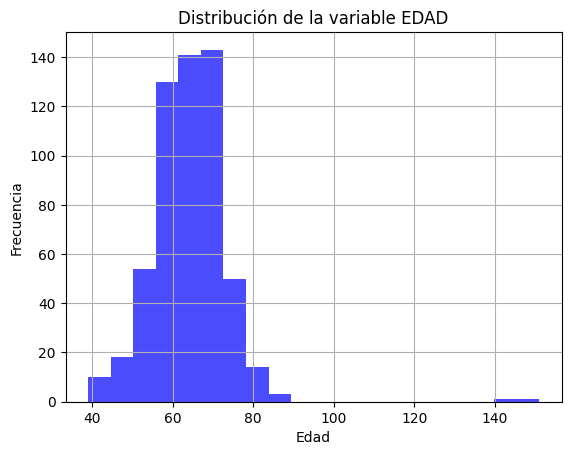

In [941]:
# Graficamos un histograma de la variable EDAD

plt.hist(data['EDAD'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable EDAD')
plt.grid(True)
plt.show()

In [942]:
# Imputamos los valores atípicos

median_age = data['EDAD'].median()
data.loc[data['EDAD'] > 100, 'EDAD'] = median_age

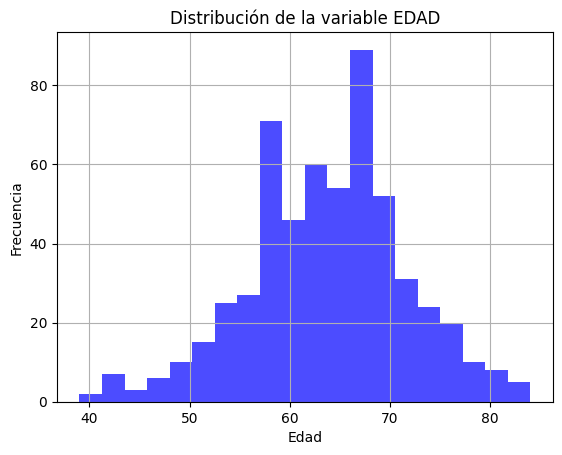

In [943]:
# Graficamos nuevamente nuestra variable EDAD

plt.hist(data['EDAD'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable EDAD')
plt.grid(True)
plt.show()

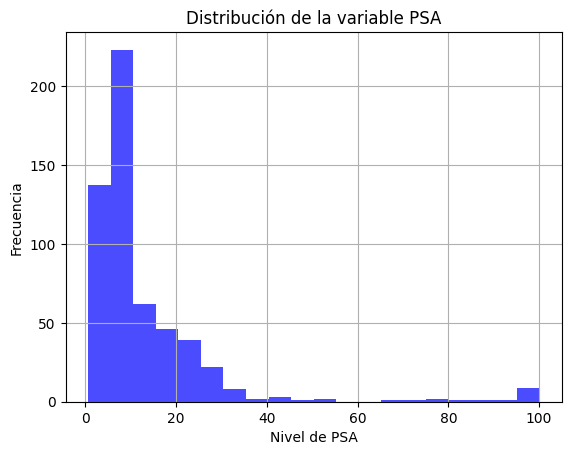

In [944]:
# Graficamos un histograma para la variable PSA

plt.hist(data['PSA'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Nivel de PSA')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable PSA')
plt.grid(True)
plt.show()

Decidimos no modificar estos valores ya que probablemente se trate de datos atípicos que no significan un error de entrada.

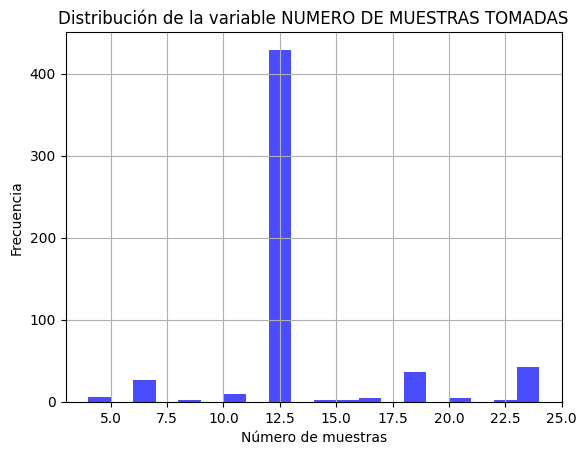

In [945]:
# Graficamos un histograma para la variable MUESTRAS TOMADAS

plt.hist(data['NUMERO DE MUESTRAS TOMADAS'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Número de muestras')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable NUMERO DE MUESTRAS TOMADAS')
plt.grid(True)
plt.show()

Variables Categóricas:

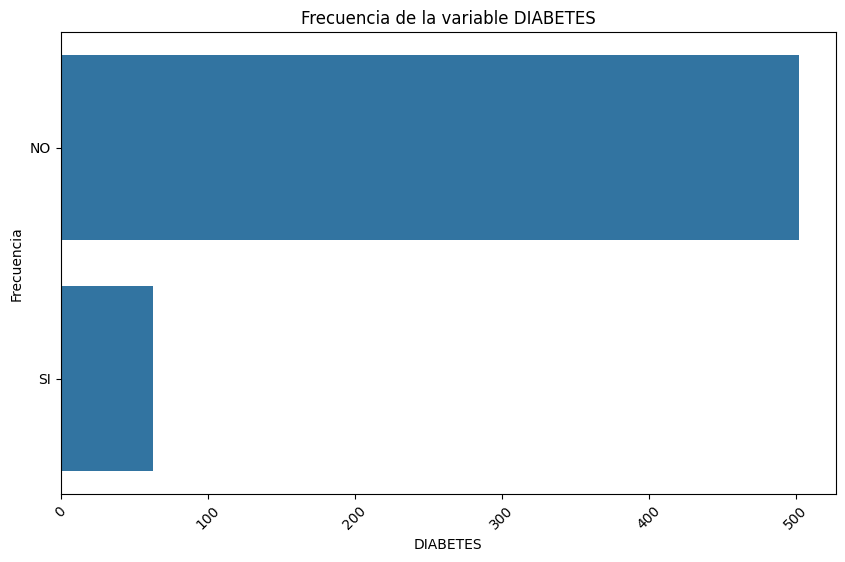

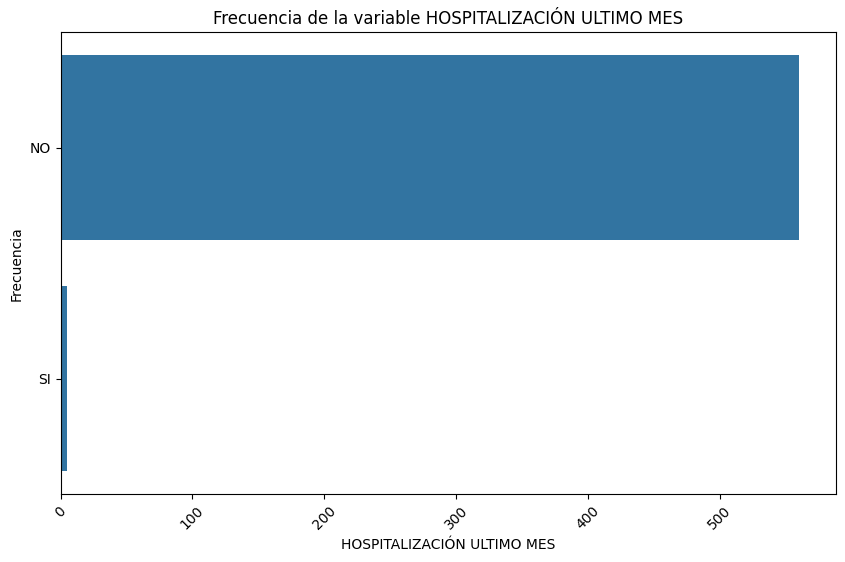

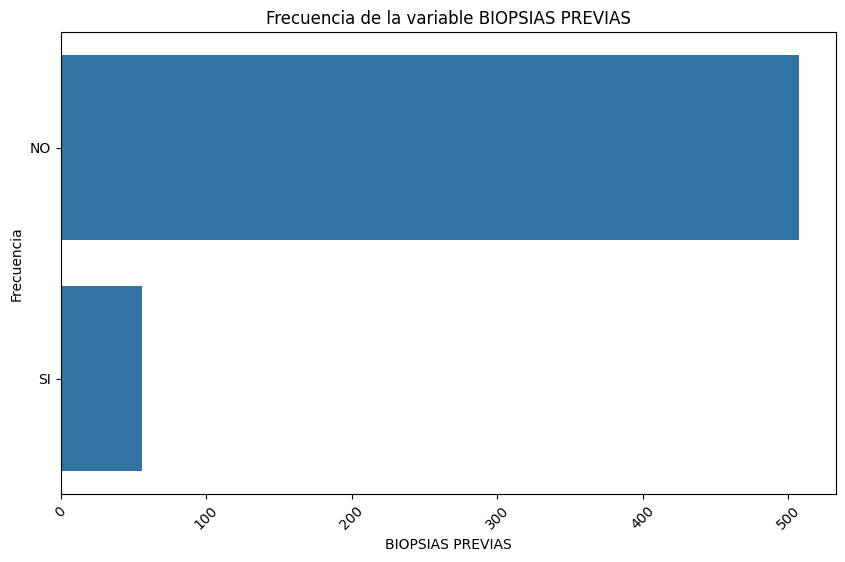

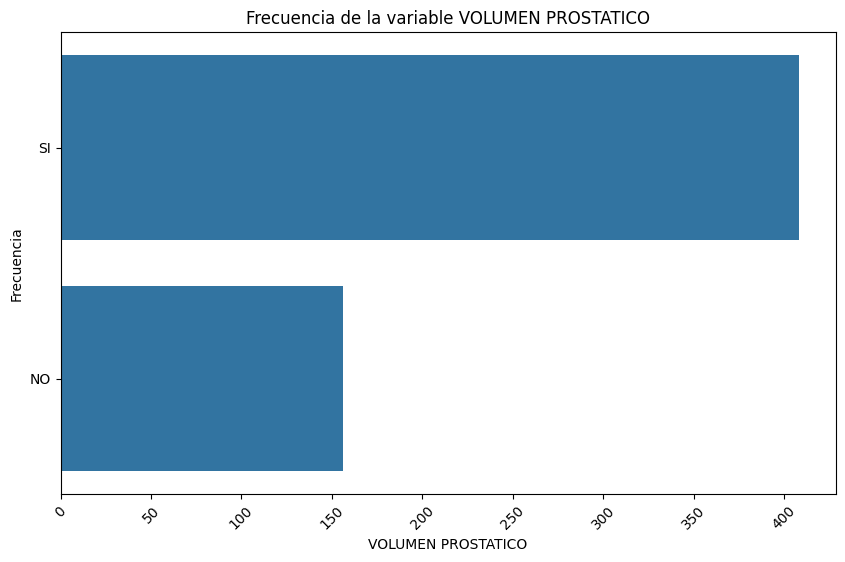

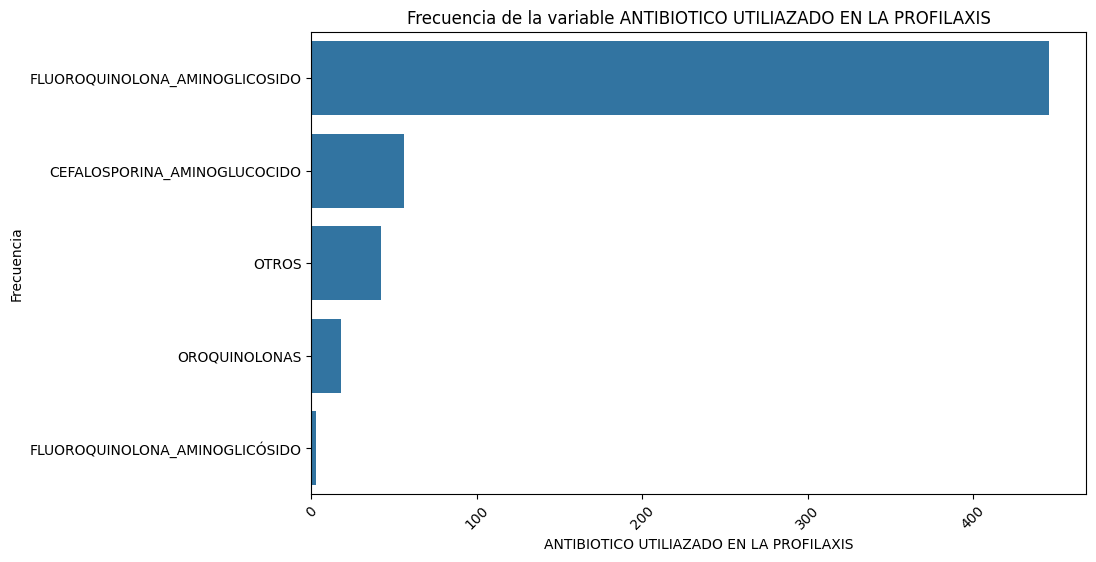

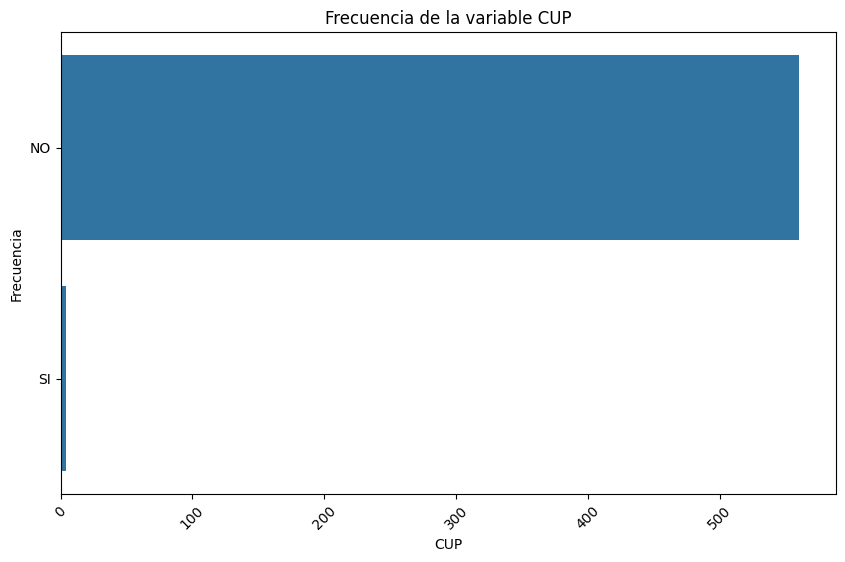

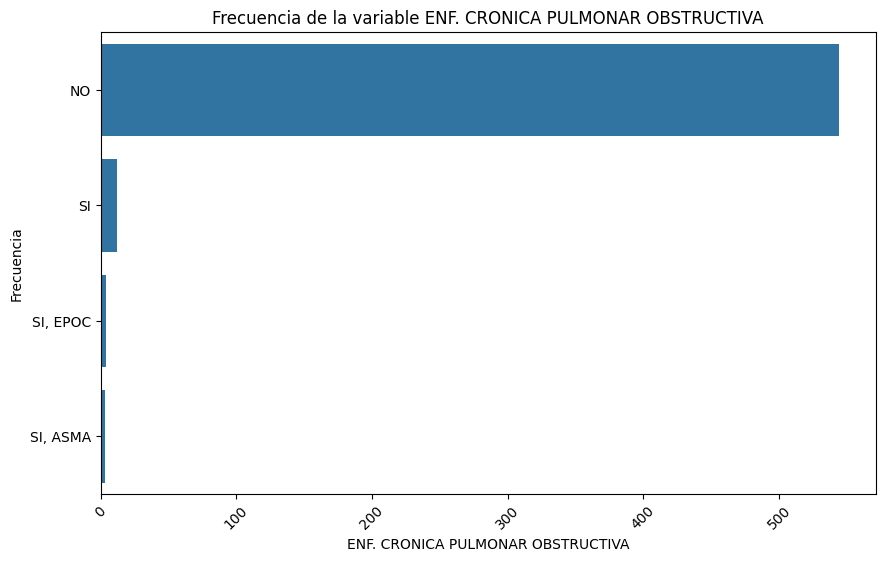

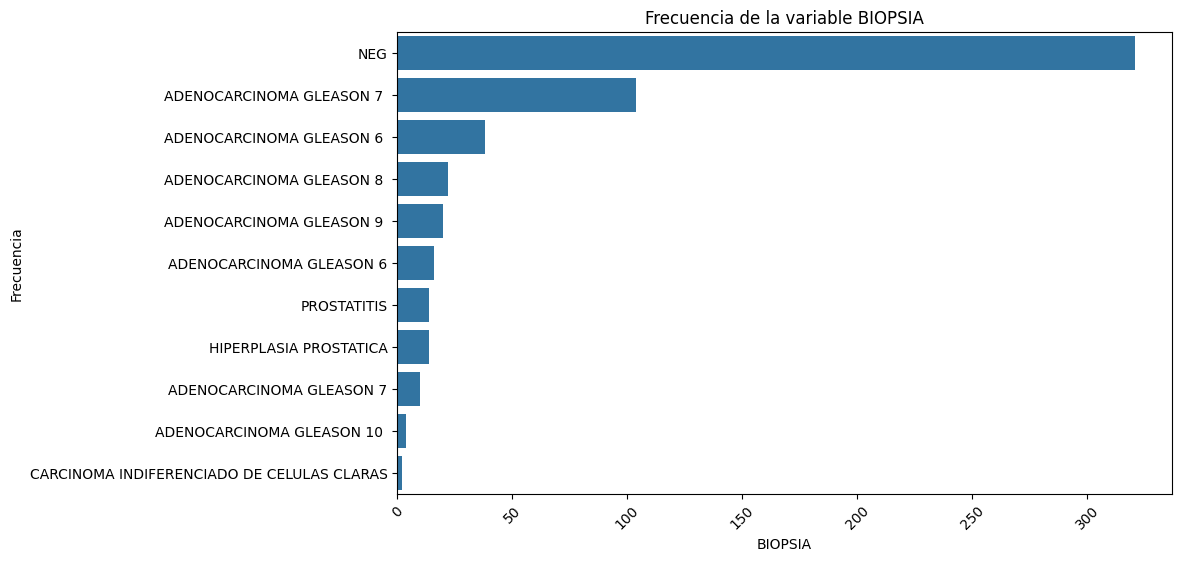

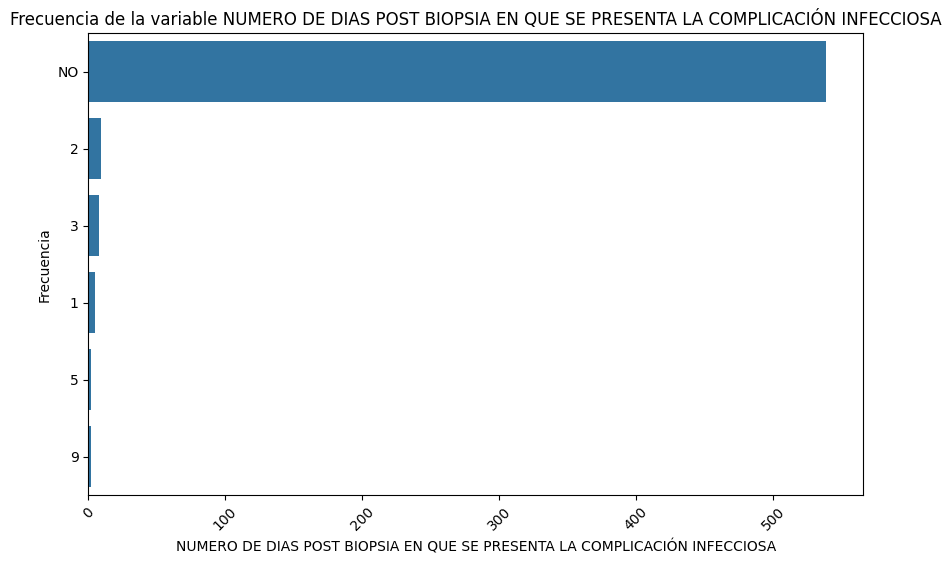

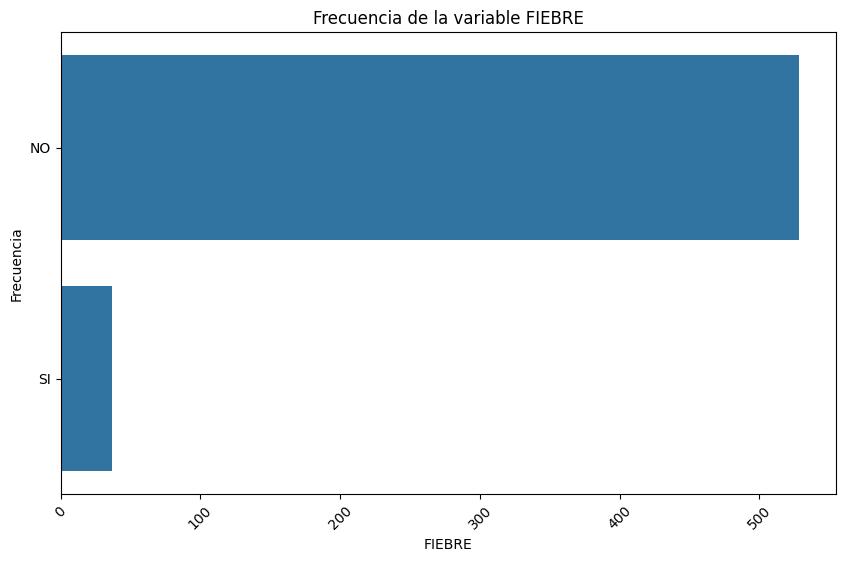

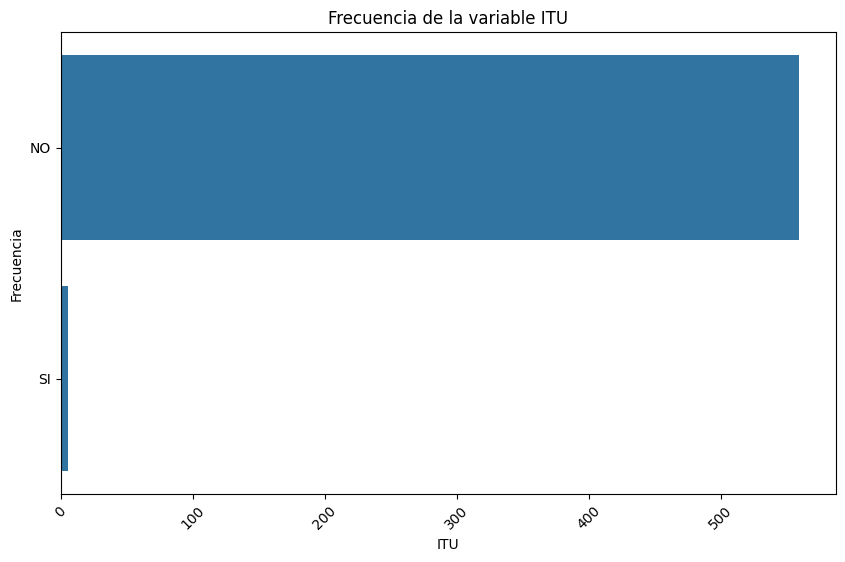

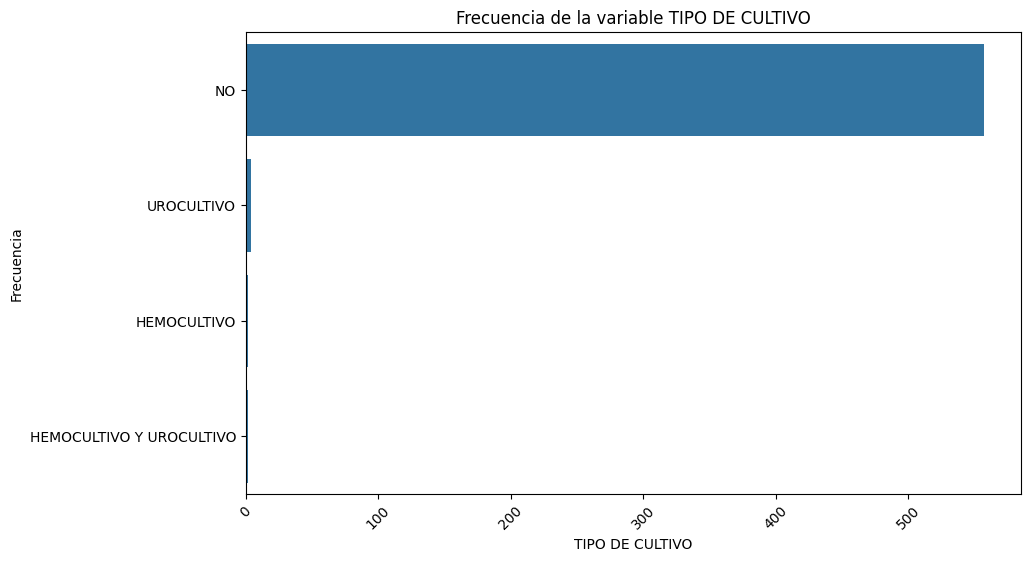

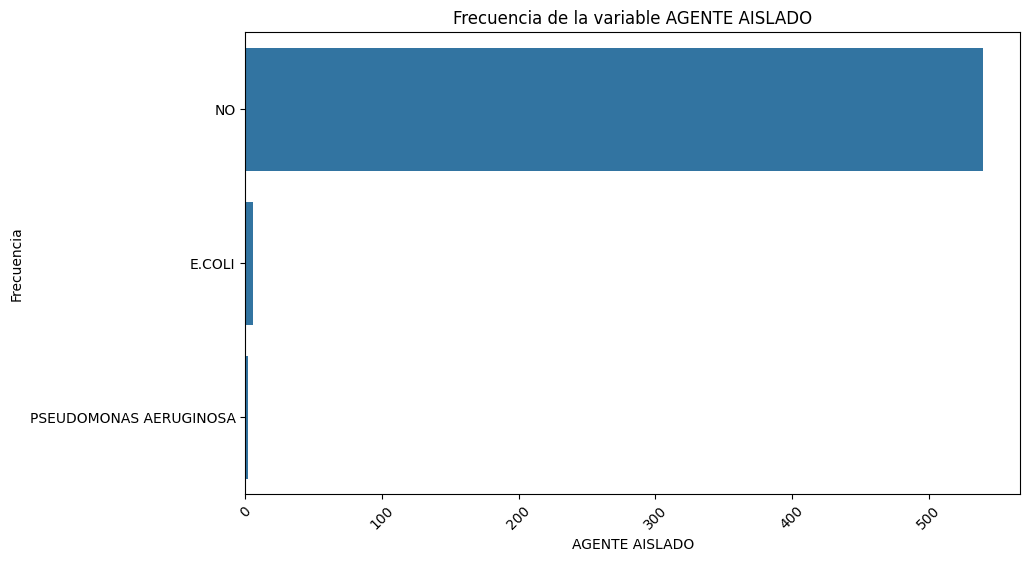

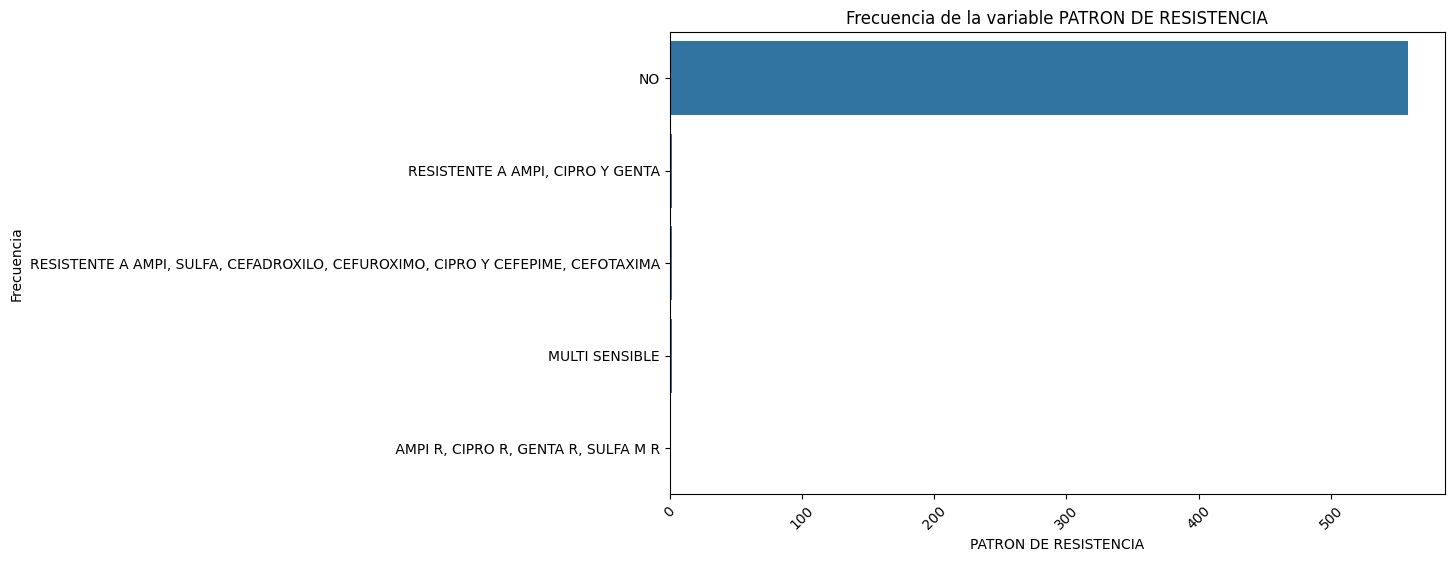

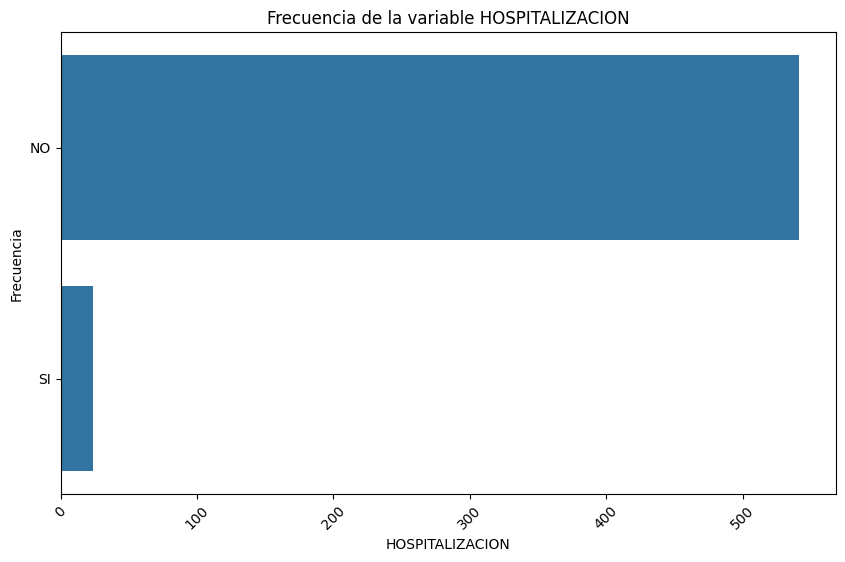

In [946]:
# Identificamos las columnas categóricas
categorical_columns = data.select_dtypes(include=['object'])

# Creamos un gráfico de barras para cada variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order = data[col].value_counts().index)
    plt.title(f'Frecuencia de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

Estos gráficos denotan un claro desbalanceo de clases que tendremos que tener en cuenta más adelante a la hora de entrenar y testear nuestro modelo. No vamos a normalizar ningún valor.

### 2) Transformación de datos

Primero buscamos datos nulos e imputamos.

In [947]:
# Revisamos los datos nulos por columna.

data.isna().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

In [948]:
# Imprimimos los valores de la variable AGENTE AISLADO

print(data['AGENTE AISLADO'].value_counts())

AGENTE AISLADO
NO                        540
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


In [949]:
# Imputamos los valores nulos y verificamos.

data['AGENTE AISLADO'].fillna('NO', inplace=True)
data['AGENTE AISLADO'].isna().sum()

C:\Users\santo\AppData\Local\Temp\ipykernel_14400\1242511775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AGENTE AISLADO'].fillna('NO', inplace=True)


0

In [950]:
# Imputamos los valores nulos de la variable PSA utilizando la mediana.

data['PSA'].fillna(data['PSA'].median(), inplace=True) 

print(data['PSA'].isna().sum())

0


C:\Users\santo\AppData\Local\Temp\ipykernel_14400\1528588802.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PSA'].fillna(data['PSA'].median(), inplace=True)


In [951]:
# Imprimimos los valores de la variable BIOPSIAS PREVIAS.

print(data['BIOPSIAS PREVIAS'].value_counts())

BIOPSIAS PREVIAS
NO    507
SI     56
Name: count, dtype: int64


In [952]:
# Imputamos valores nulos y verificamos.

data['BIOPSIAS PREVIAS'].fillna('NO', inplace=True)
data['BIOPSIAS PREVIAS'].isna().sum()

C:\Users\santo\AppData\Local\Temp\ipykernel_14400\3672311352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BIOPSIAS PREVIAS'].fillna('NO', inplace=True)


0

In [953]:
# Imprimimos los valores de la variable VOLUMEN PROSTATICO

print(data['VOLUMEN PROSTATICO'].value_counts())

VOLUMEN PROSTATICO
SI    408
NO    156
Name: count, dtype: int64


In [954]:
# Imputamos los valores nulos y verificamos.

data['VOLUMEN PROSTATICO'].fillna('NO', inplace=True)
data['VOLUMEN PROSTATICO'].isna().sum()

C:\Users\santo\AppData\Local\Temp\ipykernel_14400\2003098810.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['VOLUMEN PROSTATICO'].fillna('NO', inplace=True)


0

In [955]:
# Imprimimos los valores de la variable CUP.

print(data['CUP'].value_counts())

CUP
NO    560
SI      4
Name: count, dtype: int64


In [956]:
# Imputamos valores nulos y verificamos.

data['CUP'].fillna('NO', inplace=True)
data['CUP'].isna().sum()

C:\Users\santo\AppData\Local\Temp\ipykernel_14400\3996774229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CUP'].fillna('NO', inplace=True)


0

In [957]:
# Imprimimos los valores de la variable ENF. CRONICA PULMONAR OBSTRUCTIVA.

print(data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts())

ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          544
SI           12
SI, EPOC      4
SI, ASMA      3
Name: count, dtype: int64


In [958]:
# Imputamos valores nulos y verificamos.

data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO', inplace=True)
data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].isna().sum()

C:\Users\santo\AppData\Local\Temp\ipykernel_14400\3991112480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO', inplace=True)


0

### Chequeo de filas duplicadas y normalización

In [959]:
# Traemos la suma de los datos duplicados
data.duplicated().sum()

118

In [960]:
# Borramos los duplicados
data.drop_duplicates(inplace=True)

In [961]:
# Chequeamos que se hayan borrado
data.duplicated().sum()

0

In [962]:
# Buscamos errores o duplicados en la columna ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS.
data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO', 'OTROS'],
      dtype=object)

In [963]:
# Normalización de variable
data = data.replace('FLUOROQUINOLONA_AMINOGLICÓSIDO','FLUOROQUINOLONA_AMINOGLICOSIDO')

In [964]:
# Chuequeamos que se haya reemplazado
data['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS'], dtype=object)

In [965]:
# Buscamos errores o duplicados en la columna BIOPSIA
data['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'HIPERPLASIA PROSTATICA',
       'ADENOCARCINOMA GLEASON 7',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

In [966]:
# Normalizamos los valores

data = data.replace('ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 6')
data = data.replace('ADENOCARCINOMA GLEASON 7 ', 'ADENOCARCINOMA GLEASON 7')
data = data.replace('ADENOCARCINOMA GLEASON 8 ', 'ADENOCARCINOMA GLEASON 8')
data = data.replace('ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 9')
data = data.replace('ADENOCARCINOMA GLEASON 10 ', 'ADENOCARCINOMA GLEASON 10')

In [967]:
# Buscamos errores o duplicados en la columna BIOPSIA
data['BIOPSIA'].unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 10', 'ADENOCARCINOMA GLEASON 9',
       'ADENOCARCINOMA GLEASON 8', 'PROSTATITIS',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'], dtype=object)

### Transformamos los datos para introducirlos al modelo

In [968]:
# Guardamos las columnas numéricas en la variable data_numeric
data_numeric = data.select_dtypes(include='number')

# Guardamos las columnas categóricas en la variable data_category
data_category = data.select_dtypes(exclude='number')

# Quitamos HOSPITALIZACION de data_category y lo guardamos en data_y
data_y = data_category.pop('HOSPITALIZACION')

# Mapeamos la variable HOSPITALIZACION
data_y = data_y.map({'NO': 0, 'SI':1})

# Obtenemos los dummies de las variables categóricas
data_category = pd.get_dummies(data_category)

In [969]:
# Verificaciones

data_y

0      1
1      1
2      1
3      1
4      1
      ..
561    0
563    0
564    0
565    0
566    0
Name: HOSPITALIZACION, Length: 447, dtype: int64

In [970]:
data_category

,DIABETES_NO,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_NO,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_NO,BIOPSIAS PREVIAS_SI,VOLUMEN PROSTATICO_NO,VOLUMEN PROSTATICO_SI,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,True,False,True,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,True,False,False
1,True,False,True,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,True,False,False
2,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,True,False,False,False,False
3,True,False,True,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,True,False,False
4,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,True,False,True,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,True,False,False
563,True,False,True,False,True,False,False,True,False,True,...,True,False,False,True,False,False,False,True,False,False
564,True,False,True,False,True,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
565,True,False,True,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False


In [971]:
# Concatenamos las 3 variables en el dataframe final

data_proc = pd.concat([data_category,data_numeric,data_y], axis=1)

In [972]:
data_proc

,DIABETES_NO,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_NO,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_NO,BIOPSIAS PREVIAS_SI,VOLUMEN PROSTATICO_NO,VOLUMEN PROSTATICO_SI,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,HOSPITALIZACION
0,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,53.0,4.00,12.0,1
1,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,56.0,7.70,12.0,1
2,True,False,True,False,False,True,False,True,False,True,...,False,True,False,False,False,False,57.0,29.00,24.0,1
3,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,56.0,7.00,12.0,1
4,True,False,True,False,False,True,False,True,False,True,...,False,False,False,True,False,False,55.0,29.00,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,75.0,75.00,12.0,0
563,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,67.0,6.00,12.0,0
564,True,False,True,False,True,False,False,True,False,False,...,False,False,False,True,False,False,64.0,4.80,12.0,0
565,True,False,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,69.0,4.43,20.0,0


### Correlaciones

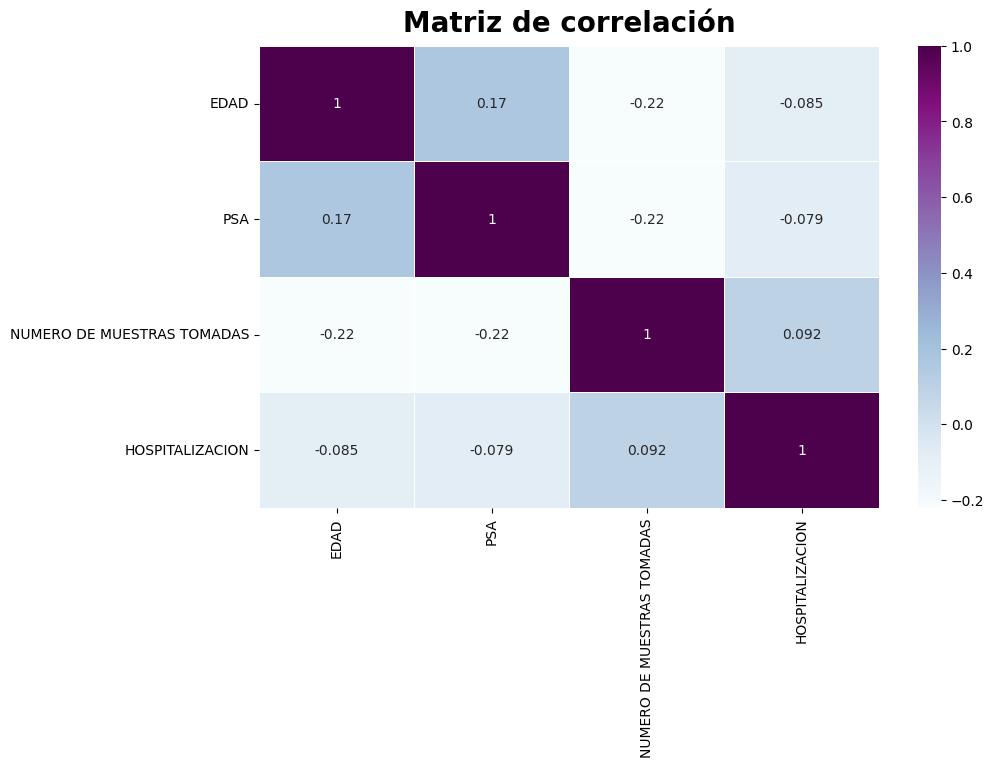

In [973]:
# Agregamos la variable HOSPITALIZACION a data_numeric
data_numeric = pd.concat([data_numeric, data_y], axis=1)

# Graficamos una Matriz de correlación de nuestras variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='BuPu', linewidths=.5)
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')
plt.show()

In [974]:
# Agregamos la variable HOSPITALIZACION a data_category
data_category = pd.concat([data_category, data_y],axis=1)

# Vemos la correlación de las variables categóricas con nuestra variable objetivo
hosp_correlation = data_category.corr(method='spearman')

hosp_correlation = hosp_correlation['HOSPITALIZACION']

hosp_correlation


DIABETES_NO                                                                                             -0.068350
DIABETES_SI                                                                                              0.068350
HOSPITALIZACIÓN ULTIMO MES_NO                                                                           -0.082756
HOSPITALIZACIÓN ULTIMO MES_SI                                                                            0.082756
BIOPSIAS PREVIAS_NO                                                                                      0.015346
BIOPSIAS PREVIAS_SI                                                                                     -0.015346
VOLUMEN PROSTATICO_NO                                                                                   -0.020287
VOLUMEN PROSTATICO_SI                                                                                    0.020287
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO                    

In [975]:
# Buscamos las variables más relevantes, es decir aquellas que tengan un valor absoluto de correlación mayor a 0.3

hosp_correlation_r = hosp_correlation[abs(hosp_correlation) > 0.3]

hosp_correlation_r

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_1     0.446517
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_2     0.601795
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_3     0.566731
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_NO   -0.958495
FIEBRE_NO                                                                      -0.684856
FIEBRE_SI                                                                       0.684856
ITU_NO                                                                         -0.489690
ITU_SI                                                                          0.489690
TIPO DE CULTIVO_NO                                                             -0.566731
TIPO DE CULTIVO_UROCULTIVO                                                      0.398926
AGENTE AISLADO_E.COLI                                                           0.489690
AGENTE AISLADO_NO    

#### Estas serán nuestras variables más importantes para determinar la hospitalización.

### 3) Exportación de los datos

In [976]:
# Borramos la variable HOSPITALIZACION en data_category
data_category = data_category.drop('HOSPITALIZACION', axis=1)

# Concatenamos data_category y data_numeric
data_final = pd.concat([data_category,data_numeric], axis=1)

data_final

,DIABETES_NO,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_NO,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_NO,BIOPSIAS PREVIAS_SI,VOLUMEN PROSTATICO_NO,VOLUMEN PROSTATICO_SI,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,HOSPITALIZACION
0,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,53.0,4.00,12.0,1
1,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,56.0,7.70,12.0,1
2,True,False,True,False,False,True,False,True,False,True,...,False,True,False,False,False,False,57.0,29.00,24.0,1
3,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,56.0,7.00,12.0,1
4,True,False,True,False,False,True,False,True,False,True,...,False,False,False,True,False,False,55.0,29.00,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,75.0,75.00,12.0,0
563,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,False,67.0,6.00,12.0,0
564,True,False,True,False,True,False,False,True,False,False,...,False,False,False,True,False,False,64.0,4.80,12.0,0
565,True,False,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,69.0,4.43,20.0,0


#### Normalización de columnas

In [977]:
# Mostramos los nombres de las columnas

data_final.columns

Index(['DIABETES_NO', 'DIABETES_SI', 'HOSPITALIZACIÓN ULTIMO MES_NO',
       'HOSPITALIZACIÓN ULTIMO MES_SI', 'BIOPSIAS PREVIAS_NO',
       'BIOPSIAS PREVIAS_SI', 'VOLUMEN PROSTATICO_NO', 'VOLUMEN PROSTATICO_SI',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS', 'CUP_NO', 'CUP_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOMA GLEASON 7', 'BIOPSIA_ADENOCARCINOMA GLEASON 8',
       'BIOPSIA_ADENOCARCINOMA GLEASON 9',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
       'BIOPSIA_HIPERPLA

In [978]:
# Creamos un diccionario con los valores normalizados
column_mapping = {
    'DIABETES_NO': 'diabetes_no',
    'DIABETES_SI': 'diabetes_si',
    'HOSPITALIZACIÓN ULTIMO MES_NO': 'hosp_ultimo_mes_no',
    'HOSPITALIZACIÓN ULTIMO MES_SI': 'hosp_ultimo_mes_si',
    'BIOPSIAS PREVIAS_NO': 'biopsias_previas_no',
    'BIOPSIAS PREVIAS_SI': 'biopsias_previas_si',
    'VOLUMEN PROSTATICO_NO': 'volumen_prostatico_no',
    'VOLUMEN PROSTATICO_SI': 'volumen_prostatico_si',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO': 'antibiotico_cefalosporina_aminoglucocido',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO': 'antibiotico_fluoroquinolona_aminoglicosido',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS': 'antibiotico_oroquinolonas',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS': 'antibiotico_otros',
    'CUP_NO': 'cup_no',
    'CUP_SI': 'cup_si',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA_NO': 'epoc_no',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI': 'epoc_si',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, ASMA': 'epoc_asma',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI, EPOC': 'epoc_epoc',
    'BIOPSIA_ADENOCARCINOMA GLEASON 10': 'biopsia_gleason_10',
    'BIOPSIA_ADENOCARCINOMA GLEASON 6': 'biopsia_gleason_6_1',
    'BIOPSIA_ADENOCARCINOMA GLEASON 7': 'biopsia_gleason_7_1',
    'BIOPSIA_ADENOCARCINOMA GLEASON 8': 'biopsia_gleason_8',
    'BIOPSIA_ADENOCARCINOMA GLEASON 9': 'biopsia_gleason_9',
    'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS': 'biopsia_carcinoma_celulas_claras',
    'BIOPSIA_HIPERPLASIA PROSTATICA': 'biopsia_hiperplasia_prostatica',
    'BIOPSIA_NEG': 'biopsia_neg',
    'BIOPSIA_PROSTATITIS': 'biopsia_prostatitis',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_1': 'dias_post_biopsia_complicacion_1',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_2': 'dias_post_biopsia_complicacion_2',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_3': 'dias_post_biopsia_complicacion_3',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_5': 'dias_post_biopsia_complicacion_5',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_9': 'dias_post_biopsia_complicacion_9',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_NO': 'dias_post_biopsia_complicacion_no',
    'FIEBRE_NO': 'fiebre_no',
    'FIEBRE_SI': 'fiebre_si',
    'ITU_NO': 'itu_no',
    'ITU_SI': 'itu_si',
    'TIPO DE CULTIVO_HEMOCULTIVO': 'cultivo_hemocultivo',
    'TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO': 'cultivo_hemocultivo_urocultivo',
    'TIPO DE CULTIVO_NO': 'cultivo_no',
    'TIPO DE CULTIVO_UROCULTIVO': 'cultivo_urocultivo',
    'AGENTE AISLADO_E.COLI': 'agente_ecoli',
    'AGENTE AISLADO_NO': 'agente_no',
    'AGENTE AISLADO_PSEUDOMONAS AERUGINOSA': 'agente_pseudomonas_aeruginosa',
    'PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R': 'patron_resistencia_ampi_r_cipro_r_genta_r_sulfa_m_r',
    'PATRON DE RESISTENCIA_MULTI SENSIBLE': 'patron_resistencia_multi_sensible',
    'PATRON DE RESISTENCIA_NO': 'patron_resistencia_no',
    'PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA': 'patron_resistencia_resistente_ampi_cipro_genta',
    'PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA': 'patron_resistencia_resistente_ampi_sulfa_cefadroxilo_cefuroximo_cipro_cefepime_cefotaxima',
    'EDAD': 'edad',
    'PSA': 'psa',
    'NUMERO DE MUESTRAS TOMADAS': 'num_muestras_tomadas',
    'HOSPITALIZACION': 'hospitalizacion'}

# Renombramos las columnas
data_final.rename(columns=column_mapping, inplace=True)

In [979]:
data_final.columns

Index(['diabetes_no', 'diabetes_si', 'hosp_ultimo_mes_no',
       'hosp_ultimo_mes_si', 'biopsias_previas_no', 'biopsias_previas_si',
       'volumen_prostatico_no', 'volumen_prostatico_si',
       'antibiotico_cefalosporina_aminoglucocido',
       'antibiotico_fluoroquinolona_aminoglicosido',
       'antibiotico_oroquinolonas', 'antibiotico_otros', 'cup_no', 'cup_si',
       'epoc_no', 'epoc_si', 'epoc_asma', 'epoc_epoc', 'biopsia_gleason_10',
       'biopsia_gleason_6_1', 'biopsia_gleason_7_1', 'biopsia_gleason_8',
       'biopsia_gleason_9', 'biopsia_carcinoma_celulas_claras',
       'biopsia_hiperplasia_prostatica', 'biopsia_neg', 'biopsia_prostatitis',
       'dias_post_biopsia_complicacion_1', 'dias_post_biopsia_complicacion_2',
       'dias_post_biopsia_complicacion_3', 'dias_post_biopsia_complicacion_5',
       'dias_post_biopsia_complicacion_9', 'dias_post_biopsia_complicacion_no',
       'fiebre_no', 'fiebre_si', 'itu_no', 'itu_si', 'cultivo_hemocultivo',
       'cultivo_hemo

#### Exportamos a un nuevo archivo .CSV

In [980]:
data_final.to_csv('data1.csv', index=False)